In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoopStructural import GeologicalModel
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext snakeviz

In [2]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = -10.
boundary_points[0,1] = -1.
boundary_points[0,2] = -1.
boundary_points[1,0] = 10.
boundary_points[1,1] = 3.
boundary_points[1,2] = 10.

In [3]:
# data.to_pickle('../LoopStructural/datasets/data/duplex.pkl')

In [4]:
np.savetxt('../LoopStructural/datasets/data/duplexbb.txt',boundary_points)

In [5]:
data = pd.read_pickle('duplextesting.pkl')
# data.to_pickle('duplextesting.pkl')

In [6]:
# splay_region = lambda pos : pos[:,0] < (-4.5-model.origin[0])/model.scale_factor
                                         
splay_region = lambda pos : np.logical_or(pos[:,0] < (-6.5-model.origin[0])/model.scale_factor, pos[:,0] 
                                          > (5-model.origin[0])/model.scale_factor)

In [7]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)


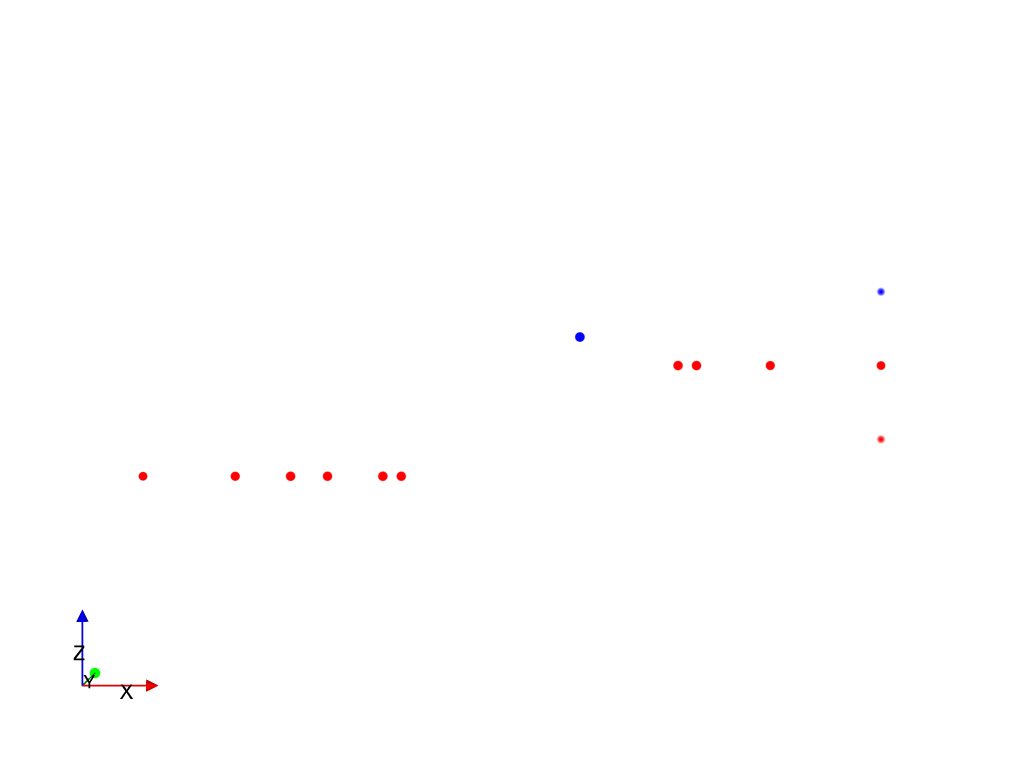

'fault_data.png'

In [8]:
viewer = LavaVuModelViewer(model)

viewer.add_points(model.data[np.logical_and(data['type']=='fault2',data['coord']==0)][['X','Y','Z']],
                  name='f1',pointsize=10,colour='red')

# viewer.add_data(fault1['feature'][0],pointsize=20)
viewer.add_points(model.data[np.logical_and(data['type']=='fault1',data['coord']==0)][['X','Y','Z']],
                  name='f2',pointsize=10,colour='blue')
# viewer.add_data(fault2['feature'][0])
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_data.png')

In [9]:

fault1 = model.create_and_add_fault('fault2',
                                    -2.,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='PLI',
                                   damp = True,
#                                     precon=precon,
                                    buffer=np.array([0.5,0.1,0.3]),
                                    regularisation=[2.,.2,.2],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10
                                   )
# splay_region = lambda pos : np.logical_or(fault1['feature'].apply_to_points(pos)[:,0] < (-4.5-model.origin[0])/model.scale_factor, 
#                                           fault1['feature'].apply_to_points(pos)[:,0] > (4.5-model.origin[0])/model.scale_factor)
fault2 = model.create_and_add_fault('fault1',
                                    -2,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='PLI',
                                   damp = True,
                                    splayregion=splay_region,
                                    splay = fault1['feature'],
                                    regularisation=[2.,.5,.5],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                     precon=precon,
                                    buffer=np.array([0.6,0.1,0.2]),
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10,
                                    overprinted=['fault2']
                                   )
strati = model.create_and_add_foliation('strati',
                                        solver='lu',
                                        interpolatortype='PLI', 
                                        nelements=1500,
                                        damp=True,
                                        buffer=np.array([0.8,0.4,0.4])
                                       )

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5292 but corresponding boolean dimension is 6048

### Figure for Fault 1 showing interpolation nodes for fault 2

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes2',pointsize=6,colour='grey')
p1.vertices(nodes[~fault1['feature'].evaluate(nodes),:])
nodes  = nodes[fault1['feature'].evaluate(nodes),:]
p = viewer.lv.points('nodes',pointsize=6,colour='black')
p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('points_before_fault.png')
viewer.lv.display()

### Figure showing fault 1 displacement field

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
# nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
# nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault1['feature'][1],locations=nodes)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -2
viewer.lv['ymin'] = -2
viewer.lv['zmin'] = -2
viewer.lv['xmax'] = 2
viewer.lv['ymax'] = 2
viewer.lv['zmax'] = 2
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_displacement_vectors.png')

### Figure for fault 2 surfaces

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes

p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(nodes[~fault1['feature'].evaluate(nodes),:])
nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
nodes = fault1['feature'].apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted',pointsize=6,colour='black')
p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_point_displaced.png')

### Fault 2 displacement vectors

In [ ]:
tmp = fault2['feature'][1].faults

In [ ]:
fault2['feature'][1].faults  = tmp
fault2['feature'][0].faults  = tmp

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes2 = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
nodes2  = nodes2[fault2['feature'].evaluate(nodes2),:]
nodes2 = nodes2#[::50]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault2['feature'][1],locations=nodes2)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.interactive()
viewer.lv.display()
viewer.lv.image('fault2_displacement_vectors.png')

### Figure showing both node movements

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# fault2['feature'][0].faults = []#fault2['feature'][1].faults
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet(),
#                       name='f2wof1'
#                      )
# fault2['feature'][0].faults = fault2['feature'][1].faults
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
                      voxet=model.voxet())
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(nodes[~fault1['feature'].evaluate(nodes),:])
nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# viewer.add_vector_field(fault2['feature'][1],locations=nodes)
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
nodes = fault1['feature'].apply_to_points(nodes)
# fault2['feature'][0].faults = []
nodes = fault2['feature'].apply_to_points(nodes)
# fault2['feature'][0].faults = fault2['feature'][1].faults

p = viewer.lv.points('nodes_faulted2',pointsize=6,colour='black')
p.vertices(nodes[fault2['feature'].evaluate(nodes),:])
p = viewer.lv.points('nodes_faulted3',pointsize=6,colour='grey')
p.vertices(nodes[~fault2['feature'].evaluate(nodes),:])
#viewer.add_vector_field(fault2['feature'][1],nodes)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.interactive()
viewer.lv.display()
viewer.lv.image('points_both_fault.png')

### Figure showing data

### Figure showing faults

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
#                       slices=[-1,0,1],
                      isovalue=0,
                     )
viewer.add_isosurface(fault2['feature'],
                      isovalue=0
                     )
# viewer.add_isosurface(fault2['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t'
#                      )
# viewer.add_isosurface(fault1['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t3'
#                      )
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1

viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_network.png')

### Figure showing faulted strati

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
# viewer.add_vector_field(strati['feature'])#,locations=nodes2)#,model.regular_grid((25,25,12)))

viewer.add_scalar_field(strati['feature'],cmap='tab20')
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('fault_duplex_scalar_field.png')
viewer.lv.display()

### Add all of the plots to a matplotlib figure

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(plt.imread('fault_data.png')[200:565, 178:844,:])
ax[0,0].set_title('A.')
ax[0,1].imshow(plt.imread('points_before_fault.png')[200:565, 178:844,:])
ax[0,1].set_title('B.')
ax[0,2].imshow(plt.imread('fault1_point_displaced.png')[200:565, 178:844,:])
ax[0,2].set_title('C.')
ax[1,0].imshow(plt.imread('fault_network.png')[200:565, 178:844,:])
ax[1,0].set_title('D.')
ax[1,1].imshow(plt.imread('points_both_fault.png')[200:565, 178:844,:])
ax[1,1].set_title('E.')
ax[1,2].imshow(plt.imread('fault_duplex_scalar_field.png')[200:565, 178:844,:])
ax[1,2].set_title('F.')

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
plt.tight_layout()
# plt.

In [ ]:
import os
os.getcwd()